# K-means clustering: first exercise

This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

- Define cluster centers through `kmeans()` function. It has two required arguments: observations and number of clusters.
- Assign cluster labels through the `vq()` function. It has two required arguments: observations and cluster centers.

In [3]:
import pandas as pd
from scipy.cluster.vq import whiten
df = pd.read_csv("dataset/fifa_18_dataset.csv")
x = df.iloc[:,0]
y = df.iloc[:,1]
comic_con = pd.DataFrame({})
comic_con['x_scaled'] = whiten(x)
comic_con['y_scaled'] = whiten(y)

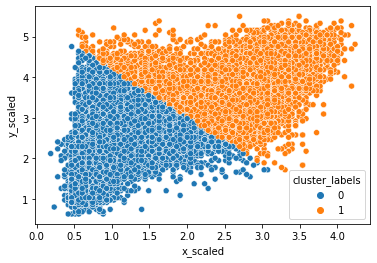

In [5]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled' , 'y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled' , 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Runtime of k-means clustering

Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the `kmeans()` function on the FIFA dataset

In [7]:
fifa = comic_con
%timeit kmeans(fifa[['x_scaled' , 'y_scaled']],2)

81.5 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Elbow method on distinct clusters

Let us use the comic con dataset to see how the elbow plot looks on a dataset with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

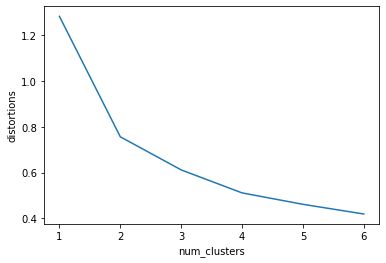

In [8]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled' , 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Elbow method on uniform data

In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a dataset with uniformly distributed points. You may want to display the data points in the IPython Shell before proceeding with the exercise.

In [10]:
from sklearn.datasets import make_blobs
from scipy.cluster.vq import whiten

# Create synthetic data with make_blobs
data, _ = make_blobs(n_samples=300, centers=5, random_state=42)
# Create a DataFrame with the synthetic data
uniform_data = pd.DataFrame(data, columns=['x', 'y'])
uniform_data['x_scaled'] = whiten(uniform_data['x'])
uniform_data['y_scaled'] = whiten(uniform_data['y'])

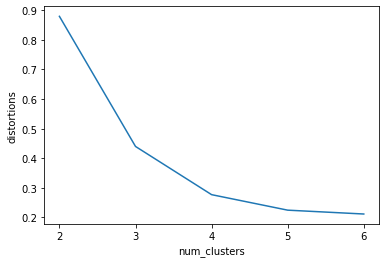

In [11]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled' , 'y_scaled']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Impact of seeds on distinct clusters

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

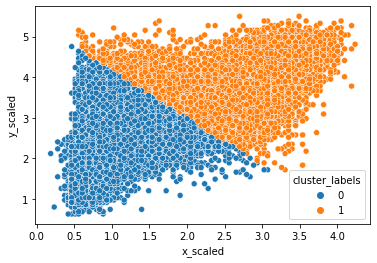

In [12]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

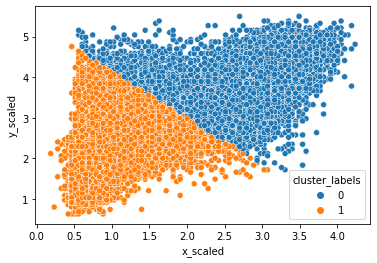

In [13]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

# Uniform clustering patterns

Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like

<center><img src="images/03.01.ppm"  style="width: 400px, height: 300px;"/></center>

In [14]:
# Create synthetic data with make_blobs
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
# Create a DataFrame with the synthetic data
mouse = pd.DataFrame(data, columns=['x', 'y'])
mouse['x_scaled'] = whiten(mouse['x'])
mouse['y_scaled'] = whiten(mouse['y'])


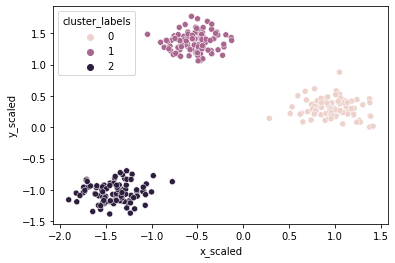

In [15]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled' , 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled' , 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

# FIFA 18: defenders revisited

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [23]:
fifa = pd.read_csv("dataset/fifa_18_sample_data.csv")
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa[ 'aggression'])

In [25]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_sliding_tackle' , 'scaled_aggression']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_sliding_tackle' , 'scaled_aggression']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
0                            1.276787           3.551673
1                            2.899923           4.341688
2                            0.715872           1.917186


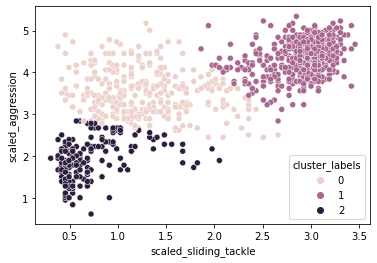

In [26]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()